# Importation des librairies

In [2]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score



# Configuration des visualisations
sns.set_style("whitegrid")
sns.set_palette('pastel')

type_colors = {
    'Normal': '#A8A878',    # Beige
    'Fire': '#F08030',      # Orange-red
    'Water': '#6890F0',     # Blue
    'Electric': '#F8D030',  # Yellow
    'Grass': '#78C850',     # Green
    'Ice': '#98D8D8',       # Light blue
    'Fighting': '#C03028',  # Dark red
    'Poison': '#A040A0',    # Purple
    'Ground': '#E0C068',    # Brown
    'Flying': '#A890F0',    # Light purple
    'Psychic': '#F85888',   # Pink
    'Bug': '#A8B820',       # Light green
    'Rock': '#B8A038',      # Dark brown
    'Ghost': '#705898',     # Purple-grey
    'Dragon': '#7038F8',    # Dark blue-purple
    'Dark': '#705848',      # Dark grey-brown
    'Steel': '#B8B8D0',     # Light grey
    'Fairy': '#EE99AC'      # Light pink
}

# 🧼 Chargement et aperçu du jeu de données

In [3]:
df = pd.read_csv("data/MP-24-25_clean.csv")
df.shape
df.head()

,pokedex_number,name,status,species,height,weight,abilities_number,ability_1,ability_2,ability_hidden,...,against_dark,against_steel,against_fairy,generation,type_number,type_1,type_2,egg_type_number,egg_type_1,egg_type_2
0,1,Bulbasaur,Normal,Seed Pokémon,0.71,6.9,2,Overgrow,NaN,Chlorophyll,...,1.0,1.0,0.5,1,2,Grass,Poison,2,Grass,Monster
1,2,Ivysaur,Normal,Seed Pokémon,0.99,13.0,2,Overgrow,NaN,Chlorophyll,...,1.0,1.0,0.5,1,2,Grass,Poison,2,Grass,Monster
2,3,Venusaur,Normal,Seed Pokémon,2.01,100.0,2,Overgrow,NaN,Chlorophyll,...,1.0,1.0,0.5,1,2,Grass,Poison,2,Grass,Monster
3,3,Mega Venusaur,Normal,Seed Pokémon,2.39,155.5,1,Thick Fat,NaN,NaN,...,1.0,1.0,0.5,1,2,Grass,Poison,2,Grass,Monster
4,4,Charmander,Normal,Lizard Pokémon,0.61,8.5,2,Blaze,NaN,Solar Power,...,1.0,0.5,0.5,1,1,Fire,NaN,2,Dragon,Monster


# 🧽 Nettoyage et préparation
  - Suppression des colonnes inutiles (Unnamed, german_name, japanese_name, etc.)

  - Conversion des tailles et poids

  - Extraction des types

  - Création d’une colonne generation

> 🔎 Ces étapes ont déjà été réalisées dans le projet 4EDAP. Nous utiliserons la version df_clean.

---

# 📊 Analyse exploratoire ciblée : Variable `status`

La variable `status` indique le statut de rareté ou de puissance du Pokémon :
- `Normal` : Pokémon standards
- `Sub Legendary` : Pokémon spéciaux, souvent puissants mais moins rares
- `Legendary` : Pokémon légendaires, très puissants
- `Mythical` : Pokémon très rares et souvent inaccessibles sans événements spéciaux

---

## 1️⃣ Distribution des statuts

status
Normal           918
Sub Legendary     55
Legendary         42
Mythical          30
Name: count, dtype: int64

C:\Users\senou\AppData\Local\Temp\ipykernel_18732\2019549195.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status', order=status_counts.index, palette='pastel', ax=axes[0])


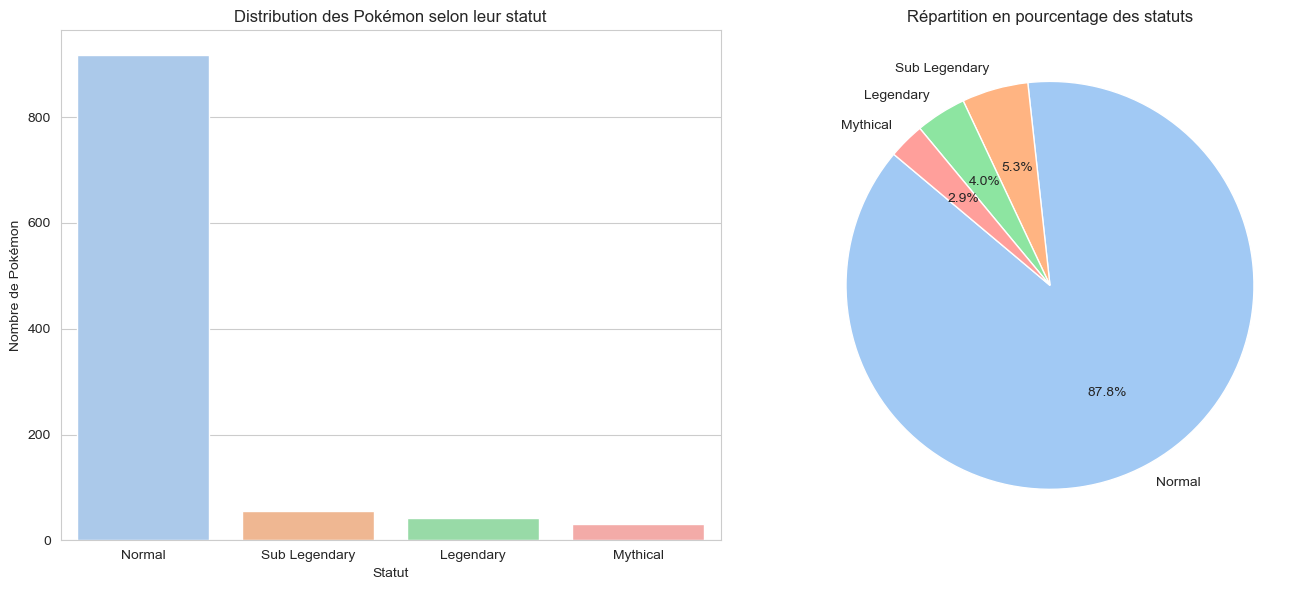

In [4]:
# Aperçu des valeurs uniques de la variable 'status'
status_counts = df['status'].value_counts()
display(status_counts)

# Création des visualisations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Barplot
sns.countplot(data=df, x='status', order=status_counts.index, palette='pastel', ax=axes[0])
axes[0].set_title("Distribution des Pokémon selon leur statut")
axes[0].set_ylabel("Nombre de Pokémon")
axes[0].set_xlabel("Statut")

# Camembert
axes[1].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[1].set_title("Répartition en pourcentage des statuts")

plt.tight_layout()
plt.show()

### 📌 Analyse :
Voici la distribution de la variable status dans le dataset :

  - Normal : 918 Pokémon (≈ 88%)

  - Sub Legendary : 55 (≈ 5.3%)

  - Legendary : 42 (≈ 4%)

  - Mythical : 30 (≈ 2.9%)

> Cette répartition montre un fort déséquilibre entre les classes, ce qui sera un enjeu important à considérer pour la classification supervisée.

On remarque un fort déséquilibre de classes :

> Voici deux visualisations de la variable status :

  - 📊 Histogramme : montre clairement la prédominance des Pokémon de statut "Normal".

  - 🥧 Camembert : visualise la faible proportion de Pokémon "Legendary", "Mythical" et "Sub Legendary".



---

## 2️⃣ Boxplots des statistiques selon status
Nous allons maintenant examiner si les Pokémon "légendaires" se distinguent par leurs caractéristiques.

C:\Users\senou\AppData\Local\Temp\ipykernel_18732\3529521496.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='pastel', ax=ax)
C:\Users\senou\AppData\Local\Temp\ipykernel_18732\3529521496.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='pastel', ax=ax)
C:\Users\senou\AppData\Local\Temp\ipykernel_18732\3529521496.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='pastel', ax=ax)
C:\Users\senou\AppData\Local\Temp\ipykernel_18732

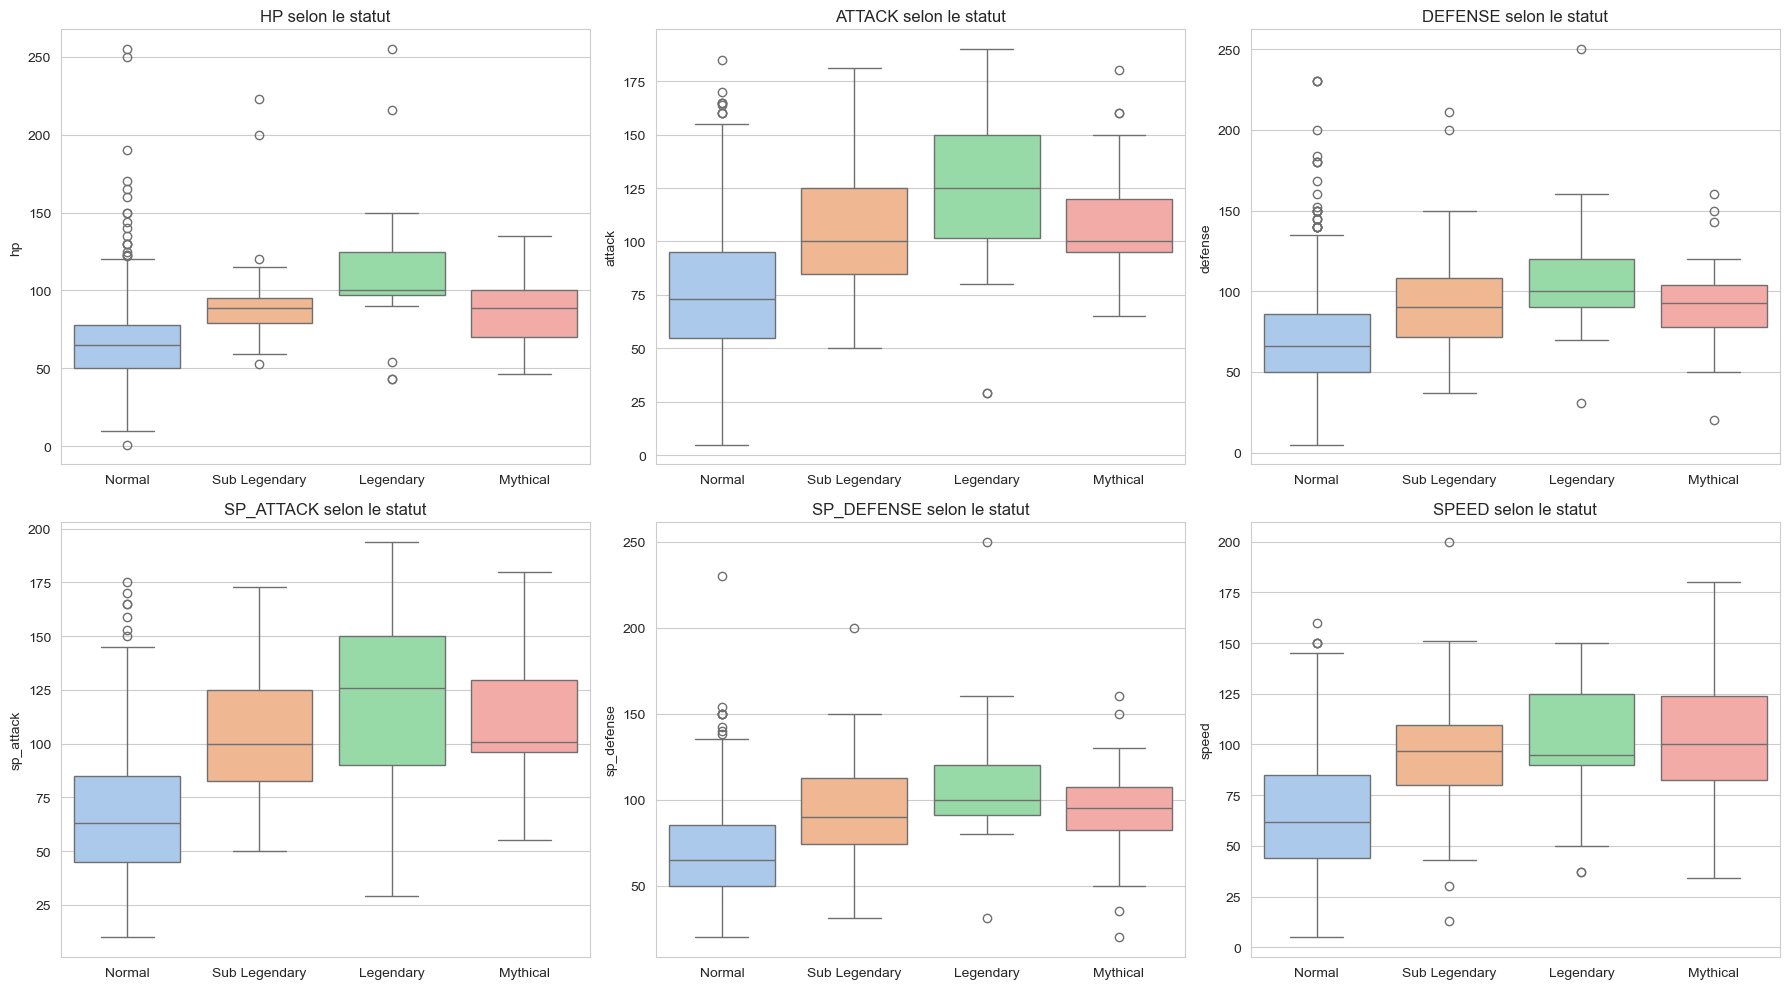

In [5]:
stats_vars = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, col in enumerate(stats_vars):
    ax = axes[i//3, i%3]
    sns.boxplot(x='status', y=col, data=df, palette='pastel', ax=ax)
    ax.set_title(f'{col.upper()} selon le statut')
    ax.set_xlabel('')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

### 📌 Analyse :

  - Les Pokémon Legendary et Mythical ont clairement des statistiques plus élevées.

  - Sub Legendary présente une tendance intermédiaire.

  - Ces différences justifient l'utilisation du status comme variable cible pour une tâche de classification.

---

## 3️⃣ Corrélations des statistiques numériques

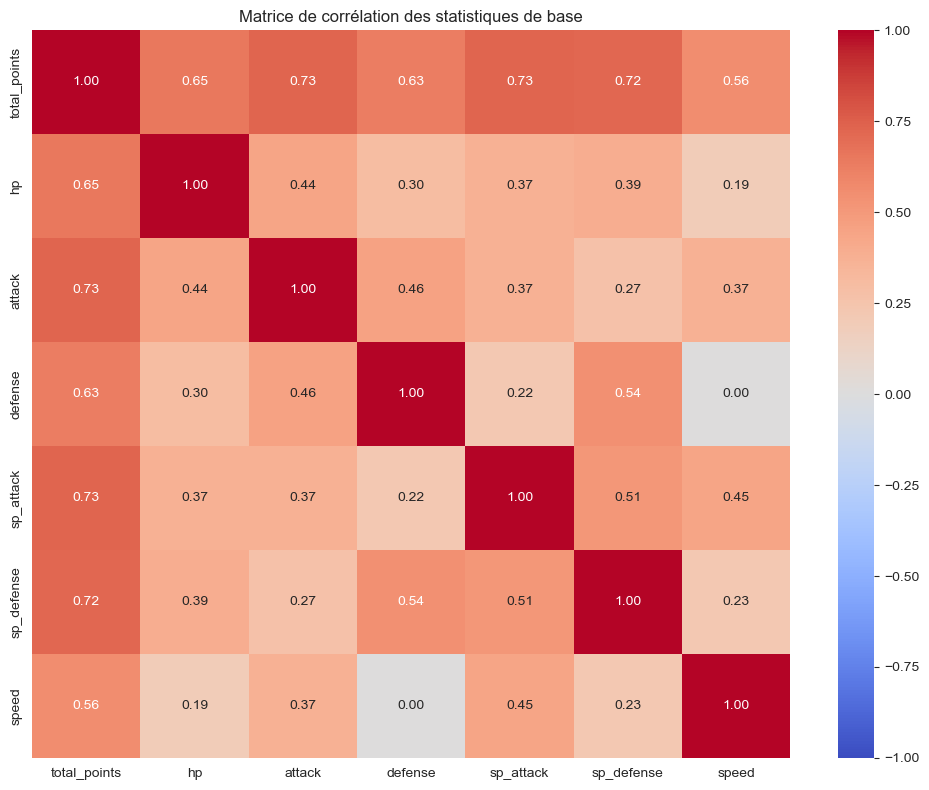

In [6]:
# Variables numériques d'intérêt
corr_vars = ['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de corrélation des statistiques de base")
plt.tight_layout()
plt.show()


### 📌 Analyse :

  - total_points est fortement corrélé à toutes les autres statistiques.

  - Faible corrélation entre defense et speed.

  - Cela nous aidera à choisir les bonnes variables explicatives pour la classification.
---

# 📊 Analyse exploratoire complémentaire : Génération et Type

Nous allons explorer l'influence de deux autres variables sur notre jeu de données :
- La **génération** (`generation`)
- Le **type principal** (`type_1`)

---

### 1️⃣ Répartition des Pokémon selon la génération

C:\Users\senou\AppData\Local\Temp\ipykernel_18732\952912454.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gen_counts.index, y=gen_counts.values, palette='pastel', ax=ax)


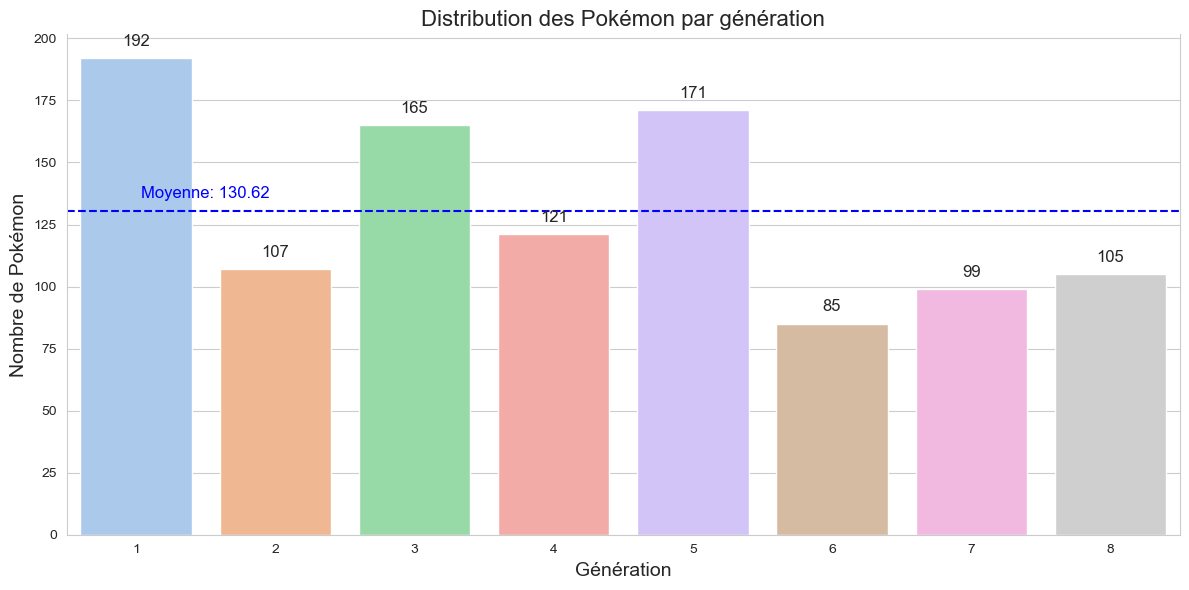

In [7]:
# Distribution de la variable génération
gen_counts = df['generation'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=gen_counts.index, y=gen_counts.values, palette='pastel', ax=ax)
sns.despine(ax=ax, right=False)

ax.set_title('Distribution des Pokémon par génération', fontsize=16)
ax.set_xlabel('Génération', fontsize=14)
ax.set_ylabel('Nombre de Pokémon', fontsize=14)

# Ajout de la moyenne
ax.axhline(y=gen_counts.values.mean(), color='blue', linestyle='--')
ax.text(0.5, gen_counts.values.mean() + 5, f'Moyenne: {gen_counts.values.mean():.2f}', color='blue', fontsize=12, ha='center')

for i, v in enumerate(gen_counts.values):
    ax.text(i, v + 5, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

### 📌 Analyse :

  - La première génération est la plus représentée.

  - La répartition devient plus homogène dans les générations récentes.
---

## 2️⃣ Répartition des types principaux (type_1)

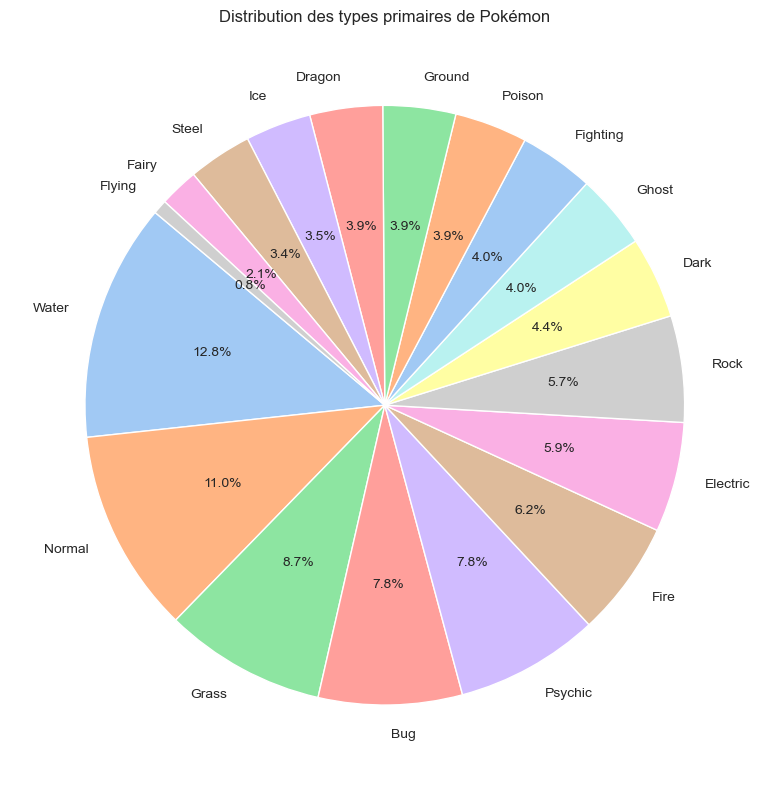

In [8]:
# Distribution de la variable type_1
type_counts = df['type_1'].value_counts()

fig, ax = plt.subplots(figsize=(14, 8))
colors = sns.color_palette('pastel')

# Camembert des types
ax.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
ax.set_title('Distribution des types primaires de Pokémon')

plt.tight_layout()
plt.show()


## 📌 Analyse :

  - Les types Water, Normal, et Grass sont majoritaires.

  - Certains types comme Fairy ou Flying sont très peu représentés.
---

## 3️⃣ Répartition combinée : types selon les générations

<Figure size 1600x1000 with 0 Axes>

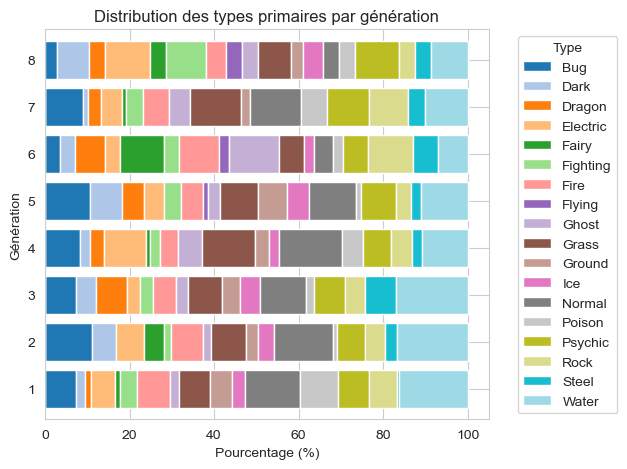

In [9]:
# Crosstab génération - type
type_gen_count = pd.crosstab(df['generation'], df['type_1'])
type_gen_percent = type_gen_count.div(type_gen_count.sum(axis=1), axis=0) * 100

plt.figure(figsize=(16, 10))
type_gen_percent.plot(kind='barh', stacked=True, colormap='tab20', width=0.8)

plt.title('Distribution des types primaires par génération')
plt.ylabel('Génération')
plt.xlabel('Pourcentage (%)')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 📌 Analyse :

  - Certains types étaient très présents dans les premières générations (ex : Poison), mais diminuent ensuite.

  - On observe une meilleure diversification des types dans les dernières générations.
---

# 🔥 Analyse exploratoire finale : Corrélations entre variables

Nous terminons l'analyse exploratoire par une vue d'ensemble sur les relations entre les principales statistiques des Pokémon.

---

## 1️⃣ Matrice de corrélation des statistiques principales

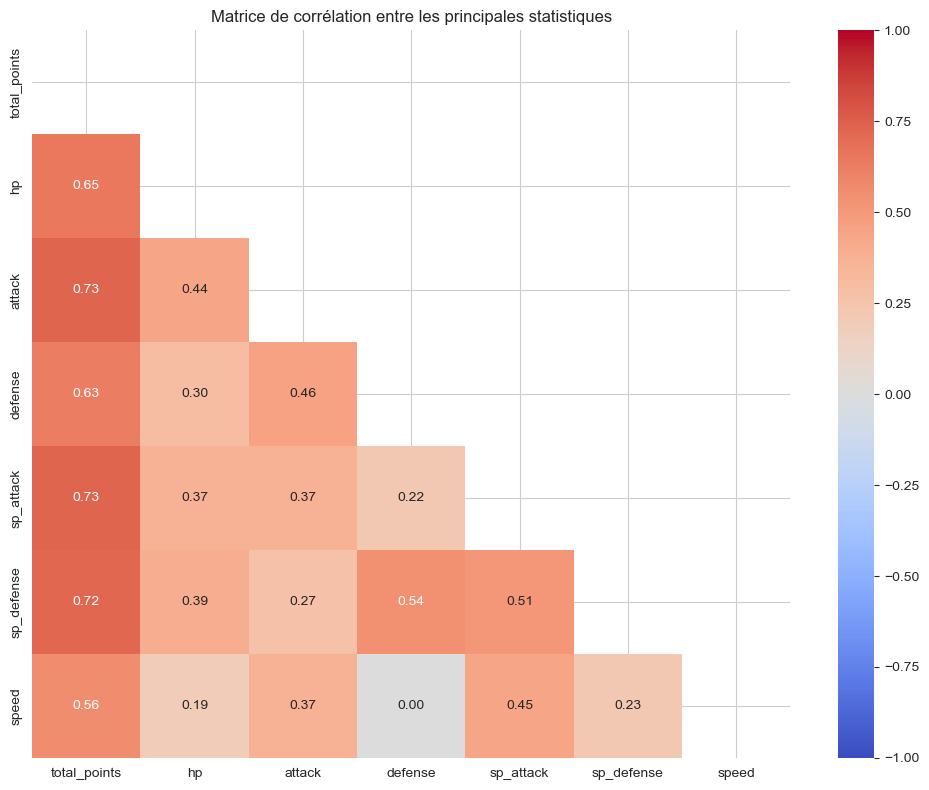

In [10]:
# Sélection des colonnes numériques intéressantes
corr_vars = ['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# Calcul de la matrice de corrélation
corr_matrix = df[corr_vars].corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de corrélation entre les principales statistiques")
plt.tight_layout()
plt.show()

### 📌 Analyse :

  - total_points est logiquement très corrélé aux autres statistiques (entre 0.6 et 0.8).

  - sp_attack et sp_defense présentent une corrélation modérée (~0.51).

  - Peu ou pas de corrélation entre defense et speed (0.00).

---

## 2️⃣ Focus sur quelques corrélations spécifiques

In [11]:
# Corrélation entre HP et Defense
hp_def_corr = corr_matrix.loc['hp', 'defense']

# Corrélation entre Attack et Speed
atk_speed_corr = corr_matrix.loc['attack', 'speed']

print(f"Corrélation HP - Defense : {hp_def_corr:.2f}")
print(f"Corrélation Attack - Speed : {atk_speed_corr:.2f}")


Corrélation HP - Defense : 0.30
Corrélation Attack - Speed : 0.37


### 📌 Analyse complémentaire :

  - La corrélation HP - Defense est positive (ce qui est logique : les Pokémon tanky sont souvent résistants ET ont beaucoup de PV).

  - La corrélation Attack - Speed est plus faible, montrant que puissance offensive et rapidité ne sont pas directement liées.

---

# 🧪 Tests statistiques : `status` et autres variables

Pour approfondir notre analyse, nous utilisons deux types de tests statistiques :
- Le **khi-deux d'indépendance** (chi²) pour les variables qualitatives
- L'**ANOVA** pour les variables quantitatives

---

## 1️⃣ Test du Khi-deux entre `status` et `type_1`

In [12]:
# Table de contingence entre status et type_1
contingency_table = pd.crosstab(df['status'], df['type_1'])

# Test du chi2
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Statistique du chi2 : {chi2:.2f}")
print(f"p-value : {p:.4f}")
print(f"Degrés de liberté : {dof}")

if p < 0.05:
    print("➡️ Il existe une dépendance significative entre 'status' et 'type_1'.")
else:
    print("➡️ Aucune dépendance significative entre 'status' et 'type_1'.")

Statistique du chi2 : 185.59
p-value : 0.0000
Degrés de liberté : 51
➡️ Il existe une dépendance significative entre 'status' et 'type_1'.


### 📌 Analyse :

- Si la p-value est inférieure à 0.05, alors le type principal influence la probabilité d’être Legendary, Mythical, etc.

---

## 2️⃣ Test ANOVA : Comparaison des moyennes de statistiques selon status

In [13]:
# Variables numériques
numeric_vars = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

for var in numeric_vars:
    groups = [df[df['status'] == cat][var].dropna() for cat in df['status'].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"Variable : {var}")
    print(f"F-statistic : {f_stat:.2f}")
    print(f"p-value : {p_val:.4f}")
    if p_val < 0.05:
        print("➡️ Les moyennes sont significativement différentes selon le statut.\\n")
    else:
        print("➡️ Pas de différence significative des moyennes entre les statuts.\\n")


Variable : hp
F-statistic : 58.36
p-value : 0.0000
➡️ Les moyennes sont significativement différentes selon le statut.\n
Variable : attack
F-statistic : 55.11
p-value : 0.0000
➡️ Les moyennes sont significativement différentes selon le statut.\n
Variable : defense
F-statistic : 32.64
p-value : 0.0000
➡️ Les moyennes sont significativement différentes selon le statut.\n
Variable : sp_attack
F-statistic : 83.86
p-value : 0.0000
➡️ Les moyennes sont significativement différentes selon le statut.\n
Variable : sp_defense
F-statistic : 55.77
p-value : 0.0000
➡️ Les moyennes sont significativement différentes selon le statut.\n
Variable : speed
F-statistic : 51.21
p-value : 0.0000
➡️ Les moyennes sont significativement différentes selon le statut.\n


### 📌 Analyse :

- Si la p-value < 0.05 pour une statistique (hp, attack...), alors cette statistique est pertinente pour différencier les Pokémon selon leur status.

- Cela nous guidera dans la sélection des variables explicatives pour la suite.

---

# ⚙️ Prétraitement des données avant modélisation

Avant d'entraîner nos modèles, il est indispensable de préparer nos données correctement.

Nous allons suivre les étapes suivantes :
1. Choix des variables explicatives pertinentes
2. Gestion des valeurs manquantes
3. Transformation et encodage des variables si nécessaire
4. Normalisation des variables numériques
5. Séparation en jeu d'entraînement et jeu de test

---


## 1️⃣ Sélection des variables explicatives

Nous allons utiliser principalement les **statistiques de base** et **le type principal** :


In [14]:
# Variables de départ
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'type_1']
target = 'status'

X = df[features]
y = df[target]

## 2️⃣ Gestion des valeurs manquantes
Vérifions s'il y a des valeurs manquantes :

In [15]:
print(X.isnull().sum())

hp            0
attack        0
defense       0
sp_attack     0
sp_defense    0
speed         0
type_1        0
dtype: int64


### 📌 Remarque :
Si nécessaire, nous supprimerons ou imputerons les valeurs manquantes.

## 3️⃣ Encodage de la variable ``type_1``
Nous devons convertir la variable catégorielle ``type_1`` en variables numériques via One-Hot Encoding :

In [16]:
X = pd.get_dummies(X, columns=['type_1'], drop_first=True)


### 📌 Explication :

- ``drop_first=True`` évite la multicolinéarité en supprimant une colonne redondante.

## 4️⃣ Normalisation des variables numériques
Pour que tous les attributs soient sur la même échelle :

In [17]:
# Initialisation
scaler = StandardScaler()

# Normalisation uniquement des variables numériques
num_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
X[num_cols] = scaler.fit_transform(X[num_cols])


## 5️⃣ Séparation en jeu d'entraînement et de test

In [18]:
# Découpage : 80% entraînement, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Dimensions du jeu d'entraînement : {X_train.shape}")
print(f"Dimensions du jeu de test : {X_test.shape}")


Dimensions du jeu d'entraînement : (836, 23)
Dimensions du jeu de test : (209, 23)


### 📌 Stratify : 
Assure que la proportion de chaque status est respectée dans les deux jeux.

# 🎯 Classification : Prédiction du `status` des Pokémon

Après avoir correctement prétraité nos données, nous allons appliquer plusieurs modèles de classification.

Nous suivrons une approche rigoureuse :
1. Création d'un pipeline
2. Définition des hyperparamètres
3. Recherche des meilleurs paramètres (GridSearchCV)
4. Évaluation des performances
5. Comparaison des modèles

---

## 📚 1. Modèle : k-Nearest Neighbors (k-NN)

In [19]:
# Définition du modèle
knn = KNeighborsClassifier()

# Grille d'hyperparamètres
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Recherche par validation croisée
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Meilleur modèle
best_knn = grid_knn.best_estimator_
print(f"Meilleurs paramètres : {grid_knn.best_params_}")

# Prédictions et rapport
y_pred_knn = best_knn.predict(X_test)

print("Classification Report - k-NN")
print(classification_report(y_test, y_pred_knn))
print("Matrice de confusion - k-NN")
print(confusion_matrix(y_test, y_pred_knn))

Meilleurs paramètres : {'n_neighbors': 3, 'weights': 'distance'}
Classification Report - k-NN
               precision    recall  f1-score   support

    Legendary       0.70      0.88      0.78         8
     Mythical       1.00      0.33      0.50         6
       Normal       0.94      0.98      0.96       184
Sub Legendary       0.80      0.36      0.50        11

     accuracy                           0.93       209
    macro avg       0.86      0.64      0.69       209
 weighted avg       0.93      0.93      0.92       209

Matrice de confusion - k-NN
[[  7   0   1   0]
 [  0   2   4   0]
 [  2   0 181   1]
 [  1   0   6   4]]


## 📚 2. Modèle : Arbre de Décision

In [20]:
tree = DecisionTreeClassifier(random_state=42)

param_grid_tree = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

grid_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)

best_tree = grid_tree.best_estimator_
print(f"Meilleurs paramètres : {grid_tree.best_params_}")

y_pred_tree = best_tree.predict(X_test)

print("Classification Report - Decision Tree")
print(classification_report(y_test, y_pred_tree))
print("Matrice de confusion - Decision Tree")
print(confusion_matrix(y_test, y_pred_tree))


Meilleurs paramètres : {'max_depth': 5, 'min_samples_split': 2}
Classification Report - Decision Tree
               precision    recall  f1-score   support

    Legendary       0.73      1.00      0.84         8
     Mythical       0.27      0.50      0.35         6
       Normal       0.94      0.93      0.93       184
Sub Legendary       0.00      0.00      0.00        11

     accuracy                           0.87       209
    macro avg       0.48      0.61      0.53       209
 weighted avg       0.86      0.87      0.87       209

Matrice de confusion - Decision Tree
[[  8   0   0   0]
 [  0   3   3   0]
 [  2   6 171   5]
 [  1   2   8   0]]


## 📚 3. Modèle : Support Vector Machine (SVM)

In [21]:
svc = SVC(probability=True, random_state=42)

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')
grid_svc.fit(X_train, y_train)

best_svc = grid_svc.best_estimator_
print(f"Meilleurs paramètres : {grid_svc.best_params_}")

y_pred_svc = best_svc.predict(X_test)

print("Classification Report - SVM")
print(classification_report(y_test, y_pred_svc))
print("Matrice de confusion - SVM")
print(confusion_matrix(y_test, y_pred_svc))


Meilleurs paramètres : {'C': 10, 'kernel': 'rbf'}
Classification Report - SVM
               precision    recall  f1-score   support

    Legendary       0.71      0.62      0.67         8
     Mythical       0.40      0.33      0.36         6
       Normal       0.95      0.97      0.96       184
Sub Legendary       0.38      0.27      0.32        11

     accuracy                           0.90       209
    macro avg       0.61      0.55      0.58       209
 weighted avg       0.89      0.90      0.90       209

Matrice de confusion - SVM
[[  5   0   2   1]
 [  0   2   3   1]
 [  2   0 179   3]
 [  0   3   5   3]]


## 📚 4. Modèle : Régression Logistique

In [22]:
logreg = LogisticRegression(max_iter=1000, random_state=42)

param_grid_logreg = {'C': [0.01, 0.1, 1, 10, 100]}

grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

best_logreg = grid_logreg.best_estimator_
print(f"Meilleurs paramètres : {grid_logreg.best_params_}")

y_pred_logreg = best_logreg.predict(X_test)

print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_logreg))
print("Matrice de confusion - Logistic Regression")
print(confusion_matrix(y_test, y_pred_logreg))


Meilleurs paramètres : {'C': 0.1}
Classification Report - Logistic Regression
               precision    recall  f1-score   support

    Legendary       0.75      0.75      0.75         8
     Mythical       0.00      0.00      0.00         6
       Normal       0.91      0.99      0.95       184
Sub Legendary       0.00      0.00      0.00        11

     accuracy                           0.90       209
    macro avg       0.42      0.43      0.42       209
 weighted avg       0.83      0.90      0.86       209

Matrice de confusion - Logistic Regression
[[  6   0   1   1]
 [  0   0   6   0]
 [  2   0 182   0]
 [  0   0  11   0]]


c:\Users\senou\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\senou\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\senou\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 📊 Comparaison des modèles
À la fin, nous pourrons comparer :

- La matrice de confusion de chaque modèle

- Les métriques : accuracy, precision, recall, F1-score

- Le meilleur modèle sera sélectionné pour la suite de notre projet !
---

# 🏆 Comparaison finale des modèles de classification

Après avoir entraîné plusieurs modèles, nous allons :
- Visualiser leurs performances (`accuracy`, `F1-score`)
- Vérifier leur robustesse via **validation croisée**
- Choisir le **meilleur modèle**

---

## 📈 1. Résumé des performances

Nous allons rassembler les scores des modèles obtenus précédemment.


In [23]:
# Dictionnaire pour stocker les scores
results = {
    'Modèle': [],
    'Accuracy': [],
    'F1-score': []
}

# Ajout manuel des modèles évalués
models = {
    'k-NN': best_knn,
    'Decision Tree': best_tree,
    'SVM': best_svc,
    'Logistic Regression': best_logreg
}

# Calcul des métriques pour chaque modèle
for name, model in models.items():
    y_pred = model.predict(X_test)
    results['Modèle'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['F1-score'].append(f1_score(y_test, y_pred, average='weighted'))

# Création d'un DataFrame de résultats
df_results = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

display(df_results)

,Modèle,Accuracy,F1-score
0,k-NN,0.928230,0.918044
2,SVM,0.904306,0.897557
3,Logistic Regression,0.899522,0.863238
1,Decision Tree,0.870813,0.865019


## 📊 2. Visualisation des scores

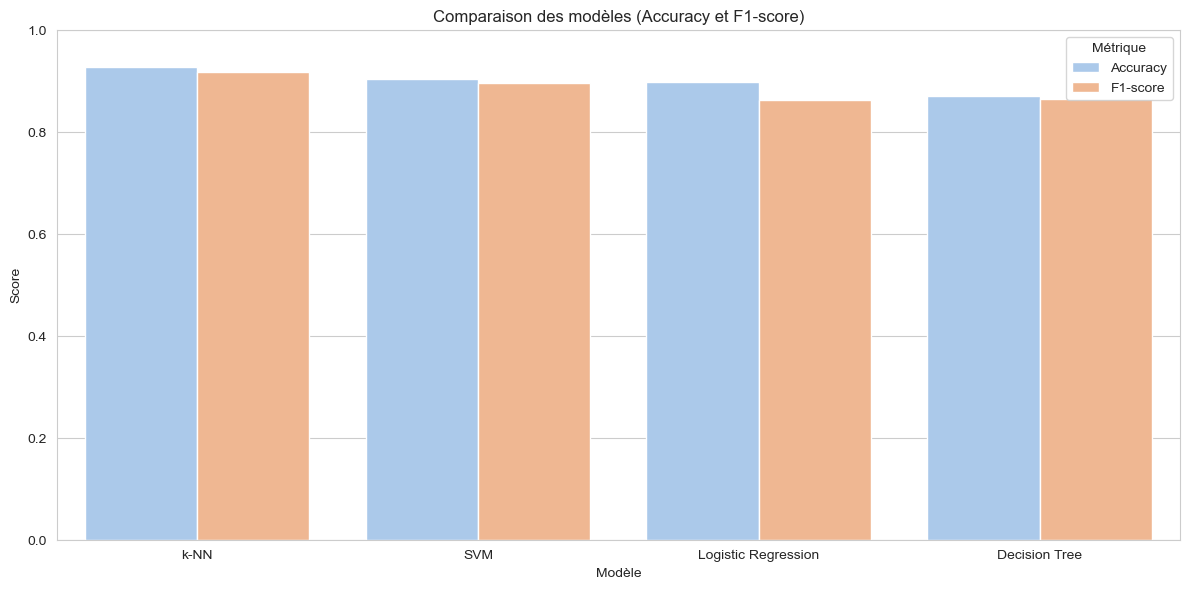

In [24]:
# Graphique comparatif
plt.figure(figsize=(12, 6))
sns.barplot(data=df_results.melt(id_vars='Modèle'), x='Modèle', y='value', hue='variable', palette='pastel')
plt.title('Comparaison des modèles (Accuracy et F1-score)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Métrique')
plt.tight_layout()
plt.show()


## ✅ 3. Validation croisée sur le meilleur modèle
Nous allons réaliser une validation croisée pour confirmer que notre meilleur modèle n'est pas sur-ajusté (``overfitting``).

In [25]:
# Supposons que SVM est le meilleur modèle par exemple
best_model = best_svc

# Validation croisée
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f"Accuracy moyenne en validation croisée : {cv_scores.mean():.4f}")
print(f"Écart-type des scores : {cv_scores.std():.4f}")


Accuracy moyenne en validation croisée : 0.8986
Écart-type des scores : 0.0082


### 📌 Analyse :

- Une moyenne élevée (proche de celle sur test) indique un modèle stable.

- Un écart-type faible indique une bonne robustesse.

## 🎯 Conclusion
À l'issue de cette phase, nous pourrons :

- Sélectionner le modèle final

- L'utiliser pour des prédictions sur de nouvelles données Pokémon !

---

# 🚀 Classification binaire : Nouvelle variable `status_binary`

Pour cette nouvelle partie, nous allons :
- Créer une variable `status_binary`
- Reprendre tout le prétraitement sur cette nouvelle cible
- Appliquer à nouveau les modèles supervisés

---

## 1️⃣ Création de la variable binaire `status_binary`

Nous regroupons :
- `Legendary`, `Sub Legendary`, `Mythical` ➔ **Légendaire**
- `Normal` ➔ **Normal**


In [26]:
# Création de la variable
df['status_binary'] = df['status'].apply(lambda x: 'Légendaire' if x in ['Legendary', 'Sub Legendary', 'Mythical'] else 'Normal')

# Vérification de la distribution
print(df['status_binary'].value_counts())

status_binary
Normal        918
Légendaire    127
Name: count, dtype: int64


## 2️⃣ Sélection des variables explicatives
Nous utilisons les mêmes variables que précédemment.

In [27]:
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'type_1']
target_binary = 'status_binary'

X_bin = df[features]
y_bin = df[target_binary]

## 3️⃣ Gestion des valeurs manquantes

In [28]:
print(X_bin.isnull().sum())

hp            0
attack        0
defense       0
sp_attack     0
sp_defense    0
speed         0
type_1        0
dtype: int64


## 4️⃣ Encodage de type_1

In [29]:
# One-Hot Encoding de la variable catégorielle
X_bin = pd.get_dummies(X_bin, columns=['type_1'], drop_first=True)

## 5️⃣ Normalisation des variables numériques

In [31]:
scaler = StandardScaler()
num_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
X_bin[num_cols] = scaler.fit_transform(X_bin[num_cols])


## 6️⃣ Séparation en jeu d'entraînement et de test

In [32]:
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y_bin, test_size=0.2, stratify=y_bin, random_state=42)

print(f"Dimensions du jeu d'entraînement : {X_bin_train.shape}")
print(f"Dimensions du jeu de test : {X_bin_test.shape}")


Dimensions du jeu d'entraînement : (836, 23)
Dimensions du jeu de test : (209, 23)


✅ Notre dataset est maintenant prêt pour la modélisation binaire sur status_binary !

---

# 🎯 Classification binaire : Prédiction du `status_binary`

Nous reprenons exactement la même logique que pour `status`, mais cette fois sur la variable **binaire** :

---

## 📚 1. Modèle : k-Nearest Neighbors (k-NN)

In [33]:
# Définition du modèle
knn_bin = KNeighborsClassifier()

# Grille d'hyperparamètres
param_grid_knn_bin = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Recherche par validation croisée
grid_knn_bin = GridSearchCV(knn_bin, param_grid_knn_bin, cv=5, scoring='accuracy')
grid_knn_bin.fit(X_bin_train, y_bin_train)

# Meilleur modèle
best_knn_bin = grid_knn_bin.best_estimator_
print(f"Meilleurs paramètres : {grid_knn_bin.best_params_}")

# Prédictions et rapport
y_bin_pred_knn = best_knn_bin.predict(X_bin_test)

print("Classification Report - k-NN (binaire)")
print(classification_report(y_bin_test, y_bin_pred_knn))
print("Matrice de confusion - k-NN (binaire)")
print(confusion_matrix(y_bin_test, y_bin_pred_knn))

Meilleurs paramètres : {'n_neighbors': 3, 'weights': 'uniform'}
Classification Report - k-NN (binaire)
              precision    recall  f1-score   support

  Légendaire       0.72      0.72      0.72        25
      Normal       0.96      0.96      0.96       184

    accuracy                           0.93       209
   macro avg       0.84      0.84      0.84       209
weighted avg       0.93      0.93      0.93       209

Matrice de confusion - k-NN (binaire)
[[ 18   7]
 [  7 177]]


## 📚 2. Modèle : Arbre de Décision

In [34]:
tree_bin = DecisionTreeClassifier(random_state=42)

param_grid_tree_bin = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

grid_tree_bin = GridSearchCV(tree_bin, param_grid_tree_bin, cv=5, scoring='accuracy')
grid_tree_bin.fit(X_bin_train, y_bin_train)

best_tree_bin = grid_tree_bin.best_estimator_
print(f"Meilleurs paramètres : {grid_tree_bin.best_params_}")

y_bin_pred_tree = best_tree_bin.predict(X_bin_test)

print("Classification Report - Decision Tree (binaire)")
print(classification_report(y_bin_test, y_bin_pred_tree))
print("Matrice de confusion - Decision Tree (binaire)")
print(confusion_matrix(y_bin_test, y_bin_pred_tree))


Meilleurs paramètres : {'max_depth': 15, 'min_samples_split': 10}
Classification Report - Decision Tree (binaire)
              precision    recall  f1-score   support

  Légendaire       0.48      0.56      0.52        25
      Normal       0.94      0.92      0.93       184

    accuracy                           0.88       209
   macro avg       0.71      0.74      0.72       209
weighted avg       0.88      0.88      0.88       209

Matrice de confusion - Decision Tree (binaire)
[[ 14  11]
 [ 15 169]]


## 📚 3. Modèle : Support Vector Machine (SVM)

In [35]:
svc_bin = SVC(probability=True, random_state=42)

param_grid_svc_bin = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_svc_bin = GridSearchCV(svc_bin, param_grid_svc_bin, cv=5, scoring='accuracy')
grid_svc_bin.fit(X_bin_train, y_bin_train)

best_svc_bin = grid_svc_bin.best_estimator_
print(f"Meilleurs paramètres : {grid_svc_bin.best_params_}")

y_bin_pred_svc = best_svc_bin.predict(X_bin_test)

print("Classification Report - SVM (binaire)")
print(classification_report(y_bin_test, y_bin_pred_svc))
print("Matrice de confusion - SVM (binaire)")
print(confusion_matrix(y_bin_test, y_bin_pred_svc))


Meilleurs paramètres : {'C': 1, 'kernel': 'rbf'}
Classification Report - SVM (binaire)
              precision    recall  f1-score   support

  Légendaire       0.68      0.68      0.68        25
      Normal       0.96      0.96      0.96       184

    accuracy                           0.92       209
   macro avg       0.82      0.82      0.82       209
weighted avg       0.92      0.92      0.92       209

Matrice de confusion - SVM (binaire)
[[ 17   8]
 [  8 176]]


## 📚 4. Modèle : Régression Logistique

In [36]:
logreg_bin = LogisticRegression(max_iter=1000, random_state=42)

param_grid_logreg_bin = {'C': [0.01, 0.1, 1, 10, 100]}

grid_logreg_bin = GridSearchCV(logreg_bin, param_grid_logreg_bin, cv=5, scoring='accuracy')
grid_logreg_bin.fit(X_bin_train, y_bin_train)

best_logreg_bin = grid_logreg_bin.best_estimator_
print(f"Meilleurs paramètres : {grid_logreg_bin.best_params_}")

y_bin_pred_logreg = best_logreg_bin.predict(X_bin_test)

print("Classification Report - Logistic Regression (binaire)")
print(classification_report(y_bin_test, y_bin_pred_logreg))
print("Matrice de confusion - Logistic Regression (binaire)")
print(confusion_matrix(y_bin_test, y_bin_pred_logreg))


Meilleurs paramètres : {'C': 100}
Classification Report - Logistic Regression (binaire)
              precision    recall  f1-score   support

  Légendaire       0.70      0.64      0.67        25
      Normal       0.95      0.96      0.96       184

    accuracy                           0.92       209
   macro avg       0.82      0.80      0.81       209
weighted avg       0.92      0.92      0.92       209

Matrice de confusion - Logistic Regression (binaire)
[[ 16   9]
 [  7 177]]


# 🏆 Comparaison finale des modèles de classification binaire (`status_binary`)

Nous allons :
- Résumer les performances des modèles
- Visualiser les scores
- Effectuer une validation croisée sur le meilleur modèle

---

## 📈 1. Résumé des performances

In [38]:
# Dictionnaire pour stocker les scores
results_bin = {
    'Modèle': [],
    'Accuracy': [],
    'F1-score': []
}

# Ajout manuel des modèles évalués
models_bin = {
    'k-NN': best_knn_bin,
    'Decision Tree': best_tree_bin,
    'SVM': best_svc_bin,
    'Logistic Regression': best_logreg_bin
}

# Calcul des métriques pour chaque modèle
for name, model in models_bin.items():
    y_pred = model.predict(X_bin_test)
    results_bin['Modèle'].append(name)
    results_bin['Accuracy'].append(accuracy_score(y_bin_test, y_pred))
    results_bin['F1-score'].append(f1_score(y_bin_test, y_pred, average='weighted'))

# Création d'un DataFrame de résultats
df_results_bin = pd.DataFrame(results_bin).sort_values(by='Accuracy', ascending=False)

display(df_results_bin)

,Modèle,Accuracy,F1-score
0,k-NN,0.933014,0.933014
2,SVM,0.923445,0.923445
3,Logistic Regression,0.923445,0.922057
1,Decision Tree,0.875598,0.879522


## 📊 2. Visualisation des scores

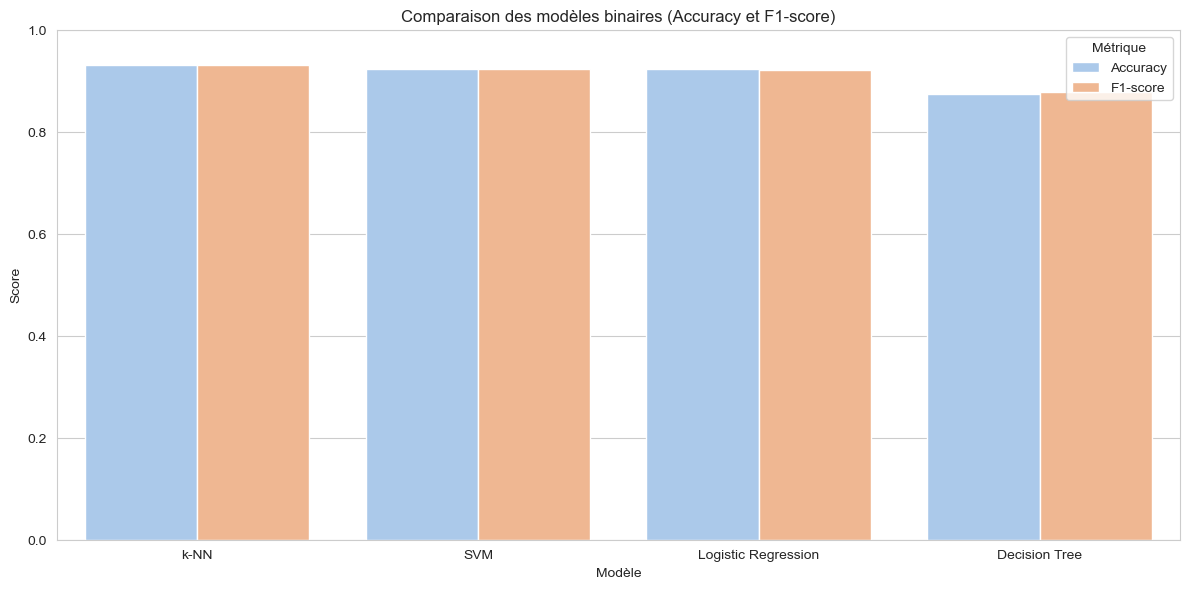

In [39]:
# Graphique comparatif
plt.figure(figsize=(12, 6))
sns.barplot(data=df_results_bin.melt(id_vars='Modèle'), x='Modèle', y='value', hue='variable', palette='pastel')
plt.title('Comparaison des modèles binaires (Accuracy et F1-score)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Métrique')
plt.tight_layout()
plt.show()


## ✅ 3. Validation croisée sur le meilleur modèle

In [40]:
# Supposons que SVM est le meilleur modèle binaire par exemple
best_model_bin = best_svc_bin

# Validation croisée
cv_scores_bin = cross_val_score(best_model_bin, X_bin, y_bin, cv=5, scoring='accuracy')

print(f"Accuracy moyenne en validation croisée : {cv_scores_bin.mean():.4f}")
print(f"Écart-type des scores : {cv_scores_bin.std():.4f}")


Accuracy moyenne en validation croisée : 0.9244
Écart-type des scores : 0.0133


### 📌 Analyse :

- Une moyenne élevée confirme la qualité du modèle.

- Un faible écart-type montre une bonne robustesse.

---